### **TEMG 4940C - Machine Learning Assignment Guideline**

---



This document provides a guideline for completing a machine learning assignment. The assignment consists of 6 part, each corresponding to each steps with reference to Tutorial’s PPT:

*Remarks: There are no restrictions in terms of what specific libraries or programming language to use, so feel free to be creative or search online for inspirations.*


---




#### **Submission Criteria**
Your submission should include the following:
1. A public git repository with your machine learning code and a brief README file describing how to run it.
   
   a. README file should include the version of python & common libraries used during the development
   
   b. You are **STRONGLY RECOMMENDED** to comment your code, both for readability & to develop good collaboration habits in dev
   
   
2. A link to your deployed dashboard (if hosted)

---



**Name**: Wong Yiu Kwan

**Student ID**: 20863020

#### **Dataset Introduction**
Customer personality analysis is a thorough examination of a company's ideal clients. It makes it simpler for businesses to adapt products in response to the unique wants, habits, and concerns of various consumer types.

Consumer personality analysis aids a corporation in tailoring its offering to its target market from various consumer categories. For instance, a firm can assess which customer segment is most likely to purchase the product and then promote the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the database of the company.


---

**Attributes:**

*Part 1. People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


*Part 2. Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


*Part 3.Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


*Part 4. Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

-------
**Ultimate Goal:**

With the Datasets aforementioned, evaluated the likelihood that customer would accepted offers in Marketing Campaign

**[Prediction Value]: Y =AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response**

#### **Step 0. Loading the Data from File Path**
- Download the dataset from Canvas
- Undergo Preliminary Analysis



In [98]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.subplots as sp

In [99]:
#Loading the Dataset
data = pd.read_csv("TEMG4940C - Assignment Dataset.csv", sep="\t")
print("Number of datapoints:", len(data)) # Show number of Data Rows in Dataset
data.head(50) # Print Top 50 Rows of the dataset for preview

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0    5524        1957  Graduation         Single  58138.0        0         0   
1    2174        1954  Graduation         Single  46344.0        1         1   
2    4141        1965  Graduation       Together  71613.0        0         0   
3    6182        1984  Graduation       Together  26646.0        1         0   
4    5324        1981         PhD        Married  58293.0        1         0   
5    7446        1967      Master       Together  62513.0        0         1   
6     965        1971  Graduation       Divorced  55635.0        0         1   
7    6177        1985         PhD        Married  33454.0        1         0   
8    4855        1974         PhD       Together  30351.0        1         0   
9    5899        1950         PhD       Together   5648.0        1         1   
10   1994        1983  Graduation        Married      NaN        1         0   
11    387        1976       Basic        Married   7500.0        0         0   
12   2125        1959  Graduation       Divorced  63033.0        0         0   
13   8180        1952      Master       Divorced  59354.0        1         1   
14   2569        1987  Graduation        Married  17323.0        0         0   
15   2114        1946         PhD         Single  82800.0        0         0   
16   9736        1980  Graduation        Married  41850.0        1         1   
17   4939        1946  Graduation       Together  37760.0        0         0   
18   6565        1949      Master        Married  76995.0        0         1   
19   2278        1985    2n Cycle         Single  33812.0        1         0   
20   9360        1982  Graduation        Married  37040.0        0         0   
21   5376        1979  Graduation        Married   2447.0        1         0   
22   1993        1949         PhD        Married  58607.0        0         1   
23   4047        1954         PhD        Married  65324.0        0         1   
24   1409        1951  Graduation       Together  40689.0        0         1   
25   7892        1969  Graduation         Single  18589.0        0         0   
26   2404        1976  Graduation        Married  53359.0        1         1   
27   5255        1986  Graduation         Single      NaN        1         0   
28   9422        1989  Graduation        Married  38360.0        1         0   
29   1966        1965         PhD        Married  84618.0        0         0   
30   6864        1989      Master       Divorced  10979.0        0         0   
31   3033        1963      Master       Together  38620.0        0         0   
32   5710        1970  Graduation       Together  40548.0        0         1   
33   7373        1952         PhD       Divorced  46610.0        0         2   
34   8755        1946      Master        Married  68657.0        0         0   
35  10738        1951      Master         Single  49389.0        1         1   
36   4339        1970         PhD        Married  67353.0        0         1   
37  10755        1976    2n Cycle        Married  23718.0        1         0   
38   8595        1973  Graduation          Widow  42429.0        0         1   
39   2968        1943         PhD       Divorced  48948.0        0         0   
40   8601        1980  Graduation        Married  80011.0        0         1   
41    503        1985      Master        Married  20559.0        1         0   
42   8430        1957  Graduation       Together  21994.0        0         1   
43   7281        1959         PhD         Single      NaN        0         0   
44   2139        1975      Master        Married   7500.0        1         0   
45   1371        1976  Graduation         Single  79941.0        0         0   
46   9909        1996    2n Cycle        Married   7500.0        0         0   
47   7286        1968  Graduation       Together  41728.0        1         0   
48   7244        1951  Graduation         Single      NaN        2         1   
49   65

In [100]:
#Information on features
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [101]:
#@title Q0. Generate Y - Predictor Value
## Before Proceeding, You may want to evaluate the Y -Predictor Value first
## By combining Y = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response

data['Y'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']


#### **Step 1. Exploratory Data Analysis**
In this step, you shall explore the data set and perform some descriptive statistics and visualizations to understand the data better. You shall also identify any potential problems or issues with the data, such as missing values, outliers, or imbalances.




In [102]:
#@title Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

# Q1a. Showcase existence of missing value, outliers & imbalances within dataset

# Missing Value 
print("Missing Value in Dataset:", data.isnull().sum().sum()) # Show number of Missing Value in Dataset

# Outliers
numerical_cols = data.select_dtypes(include = [np.number])
fig = go.Figure()
for col in numerical_cols:
    q25, q75 = np.percentile(data[col], [25, 75])
    iqr = q75 - q25
    min = q25 - 1.5 * iqr
    max = q75 + 1.5 * iqr
    outliers = data[(data[col] < min) | (data[col] > max)][col]
    if (len(outliers) > 0):
        fig.add_trace(go.Box(x = data[col], name = col, boxpoints = 'outliers', line_width = 0.7))
fig.update_layout(title='Distribution of numerical columns with outliers', width = 1000, height = 600)
fig.show()


# Imbalances    
data['Y'].value_counts() # Show number of Imbalances in Y - Predictor Value
data['NumWebPurchases'].value_counts() 

Missing Value in Dataset: 24


2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: NumWebPurchases, dtype: int64

In [103]:
#@title Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.
# Q1b. Codes to handle (i) Missing Values, (ii) Outliers
# Tips: You may refer to Slide 19 in Tutorial PPT
data_copy = data.copy()
# (ii) Outliers
for col in numerical_cols:
    q25, q75 = np.percentile(data_copy[col], [25, 75])
    iqr = q75 - q25
    min = q25 - 1.5 * iqr
    max = q75 + 1.5 * iqr
    data_copy.loc[data_copy[col] < min, col] = np.nan
    data_copy.loc[data_copy[col] > max, col] = np.nan

# (i) Missing Values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5) # k = 5
numerical_cols = data_copy.select_dtypes(include = [np.number]) # Select Numerical Columns
data_copy[numerical_cols.columns] = imputer.fit_transform(data_copy[numerical_cols.columns])  # Impute Numerical Columns

> Q1c. Explain why the above methodology to handle the missing values and outliers is chosen

**Answer:**

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | Quartile bound | The company should focus on the major customers that they are targeting at, so the extreme data should be trimmed instead of winsorizing them into certain values.|
|Handling Missing Values| Fill N/A with KNN | Other methods may ignore a lot of records and affected by the extreme data |


In [104]:
#@title Q1d. Plot 3 or more types of charts over all columns of data
# Q1d. Exploratory Data Analysis Graph Plotting

# import xxx as xxx (Import Graphing Libraries)
from explainerdashboard import ExplainerDashboard, ClassifierExplainer
import dash
import dash_core_components as dcc
import dash_html_components as html
# Plotting Histogram, Boxplot & Violin Plot for all columns
figs = []
col = data_copy.columns
for j in range(3):
    fig = sp.make_subplots(rows=5, cols=6, subplot_titles = data_copy.columns)
    for i, col in enumerate(data_copy.columns):
        if (j == 0):
            fig.add_trace(go.Histogram(x = data_copy[col], name = col), row = i // 6 + 1, col =i % 6 +1) # histogram 
        elif (j == 1):         
            fig.add_trace(go.Box(x = data_copy[col], name = " "), row = i // 6 + 1, col =i % 6 +1) # boxplot
        else:
            fig.add_trace(go.Violin(x = data_copy[col], name = " "), row = i // 6 + 1, col =i % 6 +1) # violin plot
    fig.update_layout(title='Distribution of all columns', width = 2000, height = 1300, showlegend = False)
    figs.append(fig)
    fig.show()



# Define the Plotly Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Machine Learning Project Dashboard'),
    dcc.Tabs(id='tabs', value='tab-1', children=[
        dcc.Tab(label='Data Exploration', value='tab-1'),
        dcc.Tab(label='Model Evaluation', value='tab-2'),
        dcc.Tab(label='Model Insight Generation', value='tab-3')
    ]),
    html.Div(id='tab-content')
])

# Define the content of the data exploration tab
exploration_tab = html.Div([
    html.H2('Data Exploration'),
    dcc.Dropdown(
        id='plot-type',
        options=[
            {'label': 'Histogram', 'value': 0},
            {'label': 'Boxplot', 'value': 1},
            {'label': 'Violin plot', 'value': 2}
        ],
        value=0
    ),
    html.Div(id='plot-div')
])

# Define the content of the model evaluation tab
evaluation_tab = html.Div([
    html.H2('Model Evaluation'),
    # Add components to display model evaluation
])

# Define the content of the model insight generation tab
insight_tab = html.Div([
    html.H2('Model Insight Generation'),
    # Add components to display model insight generation
])

# Define the callbacks to display the content of each tab
@app.callback(
    dash.dependencies.Output('tab-content', 'children'),
    [dash.dependencies.Input('tabs', 'value')]
)
def render_content(tab):
    if tab == 'tab-1':
        return exploration_tab
    elif tab == 'tab-2':
        return evaluation_tab
    elif tab == 'tab-3':
        return insight_tab
    else:
        return None

@app.callback(
    dash.dependencies.Output('plot-div', 'children'),
    [dash.dependencies.Input('plot-type', 'value')]
)
def update_plot(plot_type):
    if plot_type == 0:
        fig = figs[0]
    elif plot_type == 1:
        fig = figs[1]
    elif plot_type == 2:
        fig = figs[2]
    else:
        fig = None

    if fig is not None:
        graph = dcc.Graph(figure=fig)
        return graph
    else:
        return None
def update_plot(plot_type):
    # get the corresponding plot figure
    fig = figs[plot_type]
    # convert the figure to a Plotly graph object
    graph = dcc.Graph(figure=fig)
    # return the graph object to be displayed in the dashboard
    return graph

if __name__ == '__main__':
    app.run_server(host='0.0.0.0', port=3000)

> Q1e. Describe 3 observed patterns/ anomalies, and explain how would you plan/change your approach in upcoming data preparation/modeling based on the observations

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | Outliers | Trim the outliers in the data|
| Pattern 2 | Imbalanced data | Use SMOTE or upsizing the data |
| Pattern 3 | Skewed data | Normalize the data |




--------



#### **Step 2. Data Preparation**
In this step, you will prepare the data for modeling by applying appropriate techniques such as data cleaning, feature engineering, feature selection, and data transformation. You will also split the data into training and testing sets.

> Q2a. Identify Data Type of Each Column & Respective Data Preprocessing Methods
- **Type:** Nominal | Ordinal | Discrete | Continuous
- **Data Preprocessing Method:** One Hot Encoding | Rank Replacement | Normalization | Missing Data | Outlier | Feature Engineer | Data Balancing

**Answer:**

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | Norminal | Feature Engineer |
Year_Birth         | Discrete | Outliers |
Education          | Ordinal | Rank Replacement |
Marital_Status     | Nominal | One Hot Encoding |
Income             | Continuous | Missing Data, Outliers |      
Kidhome            | Discrete | Data Balancing |        
Teenhome           | Discrete | Data Balancing |   
Dt_Customer        | Discrete | Feature Engineer |      
Recency            | Discrete | Outliers |     
MntWines           | Continuous | Outliers, Normalization |    
MntFruits          | Continuous | Outliers, Normalization |    
MntMeatProducts    | Continuous | Outliers, Normalization |     
MntFishProducts    | Continuous | Outliers, Normalization |    
MntSweetProducts   | Continuous | Outliers, Normalization |    
MntGoldProds       | Continuous | Outliers, Normalization |
NumDealsPurchases  | Discrete | Outliers |  
NumWebPurchases    | Discrete | Outliers |
NumCatalogPurchases| Discrete | Outliers |
NumStorePurchases  | Discrete | Outliers |  
NumWebVisitsMonth  | Discrete | Outliers |  
AcceptedCmp3       | Nominal | Data Balancing |  
AcceptedCmp4       | Nominal | Data Balancing |       
AcceptedCmp5       | Nominal | Data Balancing |       
AcceptedCmp1       | Nominal | Data Balancing |       
AcceptedCmp2       | Nominal | Data Balancing |       
Complain           | Nominal | Data Balancing |       
Z_CostContact      | Discrete | Feature Engineer |
Z_Revenue          | Discrete | Feature Engineer |
Response           | Nominal | Data Balancing |


In [105]:
#@title Q2b. Perform the aforementioned Data Preprocessings
# Q2b. Preform Data Preprocessing

# import xxx as xxx (Import panda Libraries)
# from sklearn.preprocessing import xxx (Import sklearn libraries)
from datetime import date
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import ADASYN

df = pd.read_csv("TEMG4940C - Assignment Dataset.csv", sep="\t")
df['Y'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['Y'] = df['Y'].astype(int)
df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis = 1, inplace = True)

# Feature Selection
df.drop(['ID','Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

# Feature Creation, duarion
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
df['Dt_Customer'] = (pd.Timestamp(date.today()) - df['Dt_Customer']).dt.days

# One-hot encoding
ohe = OneHotEncoder()
Marital_Status = ohe.fit_transform(df[['Marital_Status']])
df['Marital_Status'] = Marital_Status.toarray()
# df['Divorced'] =

# Rank Replacement
df['Education'] = df['Education'].replace({'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD': 5})

# Missing value imputation
imputer = KNNImputer(n_neighbors = 3) # k = 3
df['Income'] = imputer.fit_transform(df[['Income']])

# Outliers
outliers = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
for col in outliers:
    q25, q75 = np.percentile(df[col], [25, 75])
    iqr = q75 - q25
    min = q25 - 1.5 * iqr
    max = q75 + 1.5 * iqr
    df.loc[df[col] < min, col] = min
    df.loc[df[col] > max, col] = max
    
# Normalization
# Transpose the dataframe
from sklearn.preprocessing import MinMaxScaler
df_T = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].T
scaler = MinMaxScaler(feature_range=(0, 1)).fit(df_T)
normalized_X = scaler.transform(df_T)
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']] = normalized_X.T

    
# Imbalanced data handling
adasyn = ADASYN(random_state = 42)
Y = df['Y']
x = df.drop(['Y'], axis = 1)
x, Y = adasyn.fit_resample(x, Y)



---



#### **Step 3. Modeling**
In this step, you will choose and apply one or more machine learning algorithms to build predictive models using the training data.

In [106]:
#@title Q3a. Generate Test/Training Data Split
# Q3a. Generate Test / Training Data Split

from sklearn.model_selection import train_test_split # Import Train Test Split From Libraries
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size= 0.2, random_state= 42)  


In [107]:
#@title Q3b. Choose and deploy dataset to 3+ ML Model
# Q3b. Choose 3 models to deploy dataset to
# Tips: Do not afraid to test out various models, to find out which model fits the datasets the best

# Step 1. Import Model

# Step 2. Fit Dataframe into Model

# Step 3. Generate Model Prediction (Y)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, Y_train)
gnb_pred = gnb.predict(x_test)
gnb_probi = gnb.predict_proba(x_test)
# gnb_score = gnb.predict_proba(x_test)[:, 1]
# gnb_probi_norm = gnb_probi / gnb_probi.sum(axis=1, keepdims=True)
        
# Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier
dt = MLPClassifier()
dt.fit(x_train, Y_train)
dt_pred = dt.predict(x_test)
dt_probi = dt.predict_proba(x_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, Y_train)
rf_pred = rf.predict(x_test)
rf_probi = rf.predict_proba(x_test)


> Q4a. Evaluate the models accuracy by calculating / plotting the following
1. Confusion Matrix
2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
3. Plot the ROC Curve



---



#### **Step 4. Evaluation**
In this step, you will evaluate the performance of the models using various metrics and techniques, such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, etc. You will also compare the results of different models and select the best one.


In [108]:
#@title Q4a. Evaluate the Model's Accuracy
from dash import dash_table
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, auc, roc_curve, roc_auc_score, confusion_matrix
import plotly.graph_objs as go
# (1) 
# Confusion matrices
cm_list = [metrics.confusion_matrix(Y_test, gnb_pred),
           metrics.confusion_matrix(Y_test, dt_pred),
           metrics.confusion_matrix(Y_test, rf_pred)]
name_list = ['Naive Bayes', 'Multi-layer Perceptron', 'Random Forest']
cm_display_list = [metrics.ConfusionMatrixDisplay(confusion_matrix=cm) for cm in cm_list]
fig = sp.make_subplots(rows = 1, cols = 3, subplot_titles = name_list, horizontal_spacing = 0.15)
cbarlocs = [.265, .63, 1]

for i in range(3):
    fig_list = [go.Figure(go.Heatmap(z=cm_display.confusion_matrix, colorscale='Viridis', hoverinfo='z', colorbar=dict(len=0.9, x=cbarlocs[i])), ) for cm_display in cm_display_list]
    fig.append_trace(fig_list [i].data[0], row=1, col=i+1)
    fig.update_xaxes(title_text='Predicted Class', row=1, col=i+1)
    fig.update_yaxes(title_text='True Class', row=1, col=i+1)
fig.update_layout(height=400, width=1200, title_text="Confusion Matrices", showlegend=False)
fig.show()


# (2)
# Accuracy Score
print('Accuracy score of Naive Bayes:', accuracy_score(Y_test, gnb_pred))
print('Accuracy score of Multi-layer Perceptron:', accuracy_score(Y_test, dt_pred))
print('Accuracy score of Random forest', accuracy_score(Y_test, rf_pred))

# Recall Score
print('Recall score of Naive Bayes:', recall_score (Y_test,gnb_pred, average='weighted'))
print('Recall score of Multi-layer Perceptron:', recall_score (Y_test,gnb_pred, average='weighted'))
print('Recall score of Random forest:', recall_score (Y_test, gnb_pred, average='weighted'))

#  AUC Score
for i in range(len(np.unique(Y))):
    rocauc_gnb = roc_auc_score(Y_test == i, gnb_probi[:, i])
    print('AUC score of Naive Bayes for output', i, ':', rocauc_gnb)
    rocauc_dt = roc_auc_score(Y_test == i, dt_probi[:, i])
    print('AUC score of Multi-layer Perceptron for output', i, ':',rocauc_dt)
    rocauc_rf = roc_auc_score(Y_test == i, rf_probi[:, i])
    print('AUC score of Random forest for output', i, ':', rocauc_rf)

# F1 Score
print('F1 score of Naive Bayes:', f1_score (Y_test, gnb_pred, average="weighted") )
print('F1 score of Multi-layer Perceptron:', f1_score (Y_test, dt_pred, average="weighted") )
print('F1 score of Random forest:', f1_score (Y_test, rf_pred, average="weighted") )

# (3)
# ROC Curve
gnb_fprs, gnb_tprs, dt_fprs, dt_tprs, rf_fprs, rf_tprs = [], [], [], [], [], []

for i in range(len(np.unique(Y))):
    fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test == i, gnb_probi[:, i])
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test == i, dt_probi[:, i])
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test == i, rf_probi[:, i])
    gnb_fprs.append(fpr_gnb)
    gnb_tprs.append(tpr_gnb)
    dt_fprs.append(fpr_dt)
    dt_tprs.append(tpr_dt)
    rf_fprs.append(fpr_rf)
    rf_tprs.append(tpr_rf)

fig1 = go.Figure()
for i in range(len(np.unique(Y))):
    fig1.add_trace(go.Scatter(x=gnb_fprs[i], y=gnb_tprs[i], name='Output ' + str(i), mode='lines'))
fig1.update_layout(title='ROC Curve for Naive Bayes', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig1.show()

fig2 = go.Figure()
for i in range(len(np.unique(Y))):
    fig2.add_trace(go.Scatter(x=dt_fprs[i], y=dt_tprs[i], name='Output ' + str(i), mode='lines'))
fig2.update_layout(title='ROC Curve for Multi-layer Perceptron', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig2.show()

fig3 = go.Figure()
for i in range(len(np.unique(Y))):
    fig3.add_trace(go.Scatter(x=rf_fprs[i], y=rf_tprs[i], name='Output ' + str(i), mode='lines'))
fig3.update_layout(title='ROC Curve for Random Forest', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig3.show()


gnb_acc = accuracy_score(Y_test, gnb_pred)
gnb_prec = precision_score(Y_test, gnb_pred, average='weighted')
gnb_rec = recall_score(Y_test, gnb_pred, average='weighted')
gnb_f1 = f1_score(Y_test, gnb_pred, average='weighted')

dt_acc = accuracy_score(Y_test, dt_pred)
dt_prec = precision_score(Y_test, dt_pred, average='weighted')
dt_rec = recall_score(Y_test, dt_pred, average='weighted')
dt_f1 = f1_score(Y_test, dt_pred, average='weighted')

rf_acc = accuracy_score(Y_test, rf_pred)
rf_prec = precision_score(Y_test, rf_pred, average='weighted')
rf_rec = recall_score(Y_test, rf_pred, average='weighted')
rf_f1 = f1_score(Y_test, rf_pred, average='weighted')


table_data = [
    {
        'Model': 'Naive Bayes',
        'Accuracy': gnb_acc,
        'Precision': gnb_prec,
        'Recall': gnb_rec,
        'F1 Score': gnb_f1
    },
    {
        'Model': 'Multi-layer Perceptron',
        'Accuracy': dt_acc,
        'Precision': dt_prec,
        'Recall': dt_rec,
        'F1 Score': dt_f1
    },
    {
        'Model': 'Random Forest',
        'Accuracy': rf_acc,
        'Precision': rf_prec,
        'Recall': rf_rec,
        'F1 Score': rf_f1
    }
]
table_columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
table = dash_table.DataTable(
    data=table_data,
    columns=[{'name': col, 'id': col} for col in table_columns],
    
)

evaluation_tab = html.Div([
    html.H2('Model Evaluation'),
    dcc.Graph(figure=fig),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
    dcc.Graph(figure=fig3),
    table
    ])


Accuracy score of Naive Bayes: 0.43830665978316985
Accuracy score of Multi-layer Perceptron: 0.25709860609189467
Accuracy score of Random forest 0.9509550851832731
Recall score of Naive Bayes: 0.43830665978316985
Recall score of Multi-layer Perceptron: 0.43830665978316985
Recall score of Random forest: 0.43830665978316985
AUC score of Naive Bayes for output 0 : 0.8757817136498517
AUC score of Multi-layer Perceptron for output 0 : 0.8436415059347182
AUC score of Random forest for output 0 : 0.9906092359050446
AUC score of Naive Bayes for output 1 : 0.7089389403830201
AUC score of Multi-layer Perceptron for output 1 : 0.7152985657782427
AUC score of Random forest for output 1 : 0.9847741671776007
AUC score of Naive Bayes for output 2 : 0.6460824800588335
AUC score of Multi-layer Perceptron for output 2 : 0.6209443533027852
AUC score of Random forest for output 2 : 0.9969168976636307
AUC score of Naive Bayes for output 3 : 0.7208543150508853
AUC score of Multi-layer Perceptron for output 

/Users/anson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



> Q4b. After Evaluation, Please indicate which model would you eventually pursue & the underlying rationale

**Answer:**

I choose Random Forest because it has the highest score in accuracy, recall AUC and F1.



---



#### **Step 5. Optimization**
In this step, you will try to improve the performance of the best model by applying some advanced techniques such as hyperparameter tuning, K-fold Cross Validation, ensemble methods, etc.

In [34]:
#@title Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

# Step 1. Head to the library that you sourced your pre-trained models from, and look at what hyperparameters are available for tuning

# Step 2. Try and Test out various combinations to observe the minor differences hyper-parameter tuning makes

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

from sklearn.model_selection import RandomizedSearchCV

# Define a list of hyperparameter combinations to try
hyperparameters = [
    {
        'n_estimators': 500,
        'max_depth': 20,
        'max_features': 'auto',
        'min_samples_split': 5,
        'min_impurity_decrease': 0.0,
        'bootstrap': True
    },
    {
        'n_estimators': 1000,
        'max_depth': 10,
        'max_features': 'sqrt',
        'min_samples_split': 10,
        'min_impurity_decrease': 0.05,
        'bootstrap': True
    },
    {
        'n_estimators': 2000,
        'max_depth': None,
        'max_features': 'log2',
        'min_samples_split': 2,
        'min_impurity_decrease': 0.1,
        'bootstrap': False
    },
]

# Loop over the hyperparameter combinations and evaluate the performance
best_score = 0
for params in hyperparameters:
    # Create a Random Forest Classifier with the given hyperparameters
    rf_model = RandomForestClassifier(**params, random_state=42)

    # Train the model on the training set
    rf_model.fit(x_train, Y_train)

    # Evaluate the model on the validation set
    y_pred_trial = rf_model.predict(x_train)
    score = accuracy_score(Y_train, y_pred_trial)

    # Check if this set of hyperparameters is the best so far
    if score > best_score:
        best_score = score
        best_params = params
        best_model = rf_model

# Calculate the accuracy score of the best model
accuracy = accuracy_score(Y_test, best_model.predict(x_test))

# View the best hyperparameters and the resulting accuracy score
print("Best hyperparameters: ", best_params)
print("Old accuracy score:", accuracy_score(Y_test, rf_pred))
print("New accuracy score:", accuracy)
print("Increase in accuracy score:", accuracy - accuracy_score(Y_test, rf_pred))

Best hyperparameters:  {'n_estimators': 500, 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 5, 'min_impurity_decrease': 0.0, 'bootstrap': True}
Old accuracy score: 0.9597523219814241
New accuracy score: 0.9638802889576883
Increase in accuracy score: 0.0041279669762641635


In [25]:
#@title Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

# Step 1. Import K-fold Cross Validation Libraries
# from sklearn.model_selection import cross_val_score

# Step 2. Generate Cross-validation grid containing various combination of hyper-parameter (Tips: Check Slide 48 in Tutorial PPT)

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['gini', 'entropy']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {
    'n_estimators': rf_n_estimators,
    'max_depth': rf_max_depth,
    'max_features': rf_max_features,
    'criterion': rf_criterion,
    'min_samples_split': rf_min_samples_split,
    'min_impurity_decrease': rf_min_impurity_decrease,
    'bootstrap': rf_bootstrap
}

# Create the model to be tuned
rf_base = RandomForestClassifier(random_state=42)

# Create the random search Random Forest
rf_random = RandomizedSearchCV( estimator = rf_base, param_distributions = rf_grid,
n_iter = 200, cv = 3, verbose = 2, random_state = 42, n_jobs = -1, error_score = 'raise'
)

# Fit the random search model
rf_random.fit(x_train, Y_train)

# Get the best model from the random search
rf_best = rf_random.best_estimator_

# Use the best model to predict the test set labels
y_pred_new = rf_best.predict(x_test)

# Calculate the accuracy score of the best model
accuracy = accuracy_score(Y_test, y_pred_new)

# View the best parameters from the random search
print("Best hyperparameters: ", rf_random.best_params_)
print("Old accuracy score:", accuracy_score(Y_test, rf_pred))
print("New accuracy score:", accuracy)
print("Increase in accuracy score:", accuracy - accuracy_score(Y_test, rf_pred))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=1000; total time=   4.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=1000; total time=   4.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=6, n_estimators=1200; total time=   6.5s
[CV] END bootstrap=True, criterio

/Users/anson/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END bootstrap=False, criterion=entropy, max_depth=55, max_features=log2, min_impurity_decrease=0.0, min_samples_split=3, n_estimators=2000; total time=  45.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=55, max_features=log2, min_impurity_decrease=0.0, min_samples_split=3, n_estimators=2000; total time=  45.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=600; total time=   8.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=600; total time=   9.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=55, max_features=log2, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=400; total time=   5.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=55, max_features=log2, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=400; total time=   5.7s
[CV] END bootstrap=T

In [25]:
#@title Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

# Step 1. Import Relevant functions from Libraries
from sklearn.ensemble import BaggingClassifier
# Step 2. Add ensembling methods on top of Base models
bagging = BaggingClassifier (base_estimator = RandomForestClassifier(), n_estimators=10, max_samples=0.5, max_features=0.5)
bagging.fit(x_train, Y_train)
# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
print("Old accuracy score:", accuracy_score(Y_test, rf_pred))
print("New accuracy score:", bagging.score(x_test, Y_test))
print("Decrease in accuracy score:", bagging.score(x_test, Y_test) - accuracy_score(Y_test, rf_pred))

Old accuracy score: 0.9566563467492261
New accuracy score: 0.9318885448916409
Decrease in accuracy score: -0.024767801857585203




---



#### **Step 6. Interpretation**
In this step, you will interpret the results of the best model and explain its predictions using some methods such as SHAP values, LIME, etc. You will also discuss the limitations and implications of the model and provide some recommendations for future work.

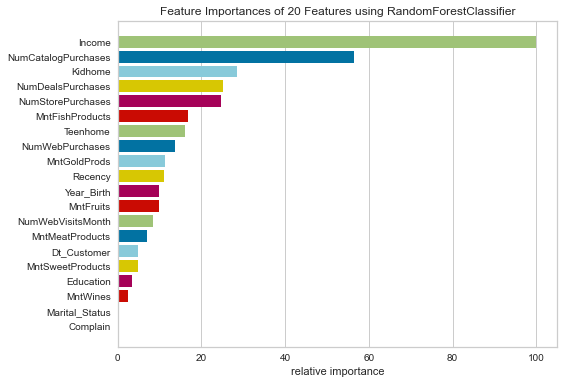

Permutation explainer: 1938it [06:21,  4.95it/s]                          


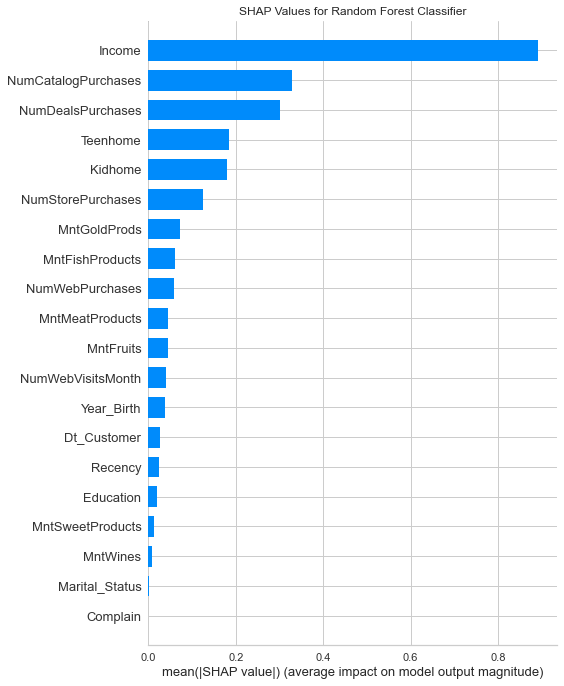

/Users/anson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



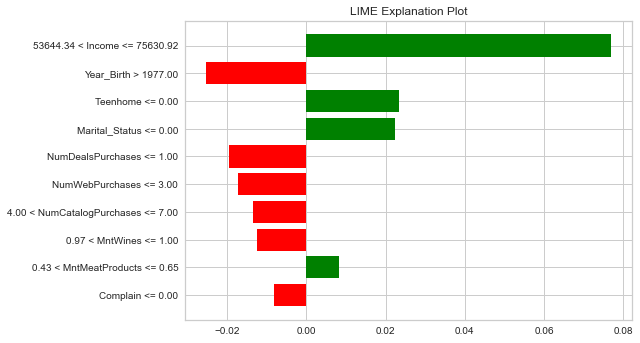

In [123]:
#@title Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

# # Step 1. Import Graph Plotting Libraries (if any)
import io
import base64
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
# # (a) Feature Importance Plot
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
# Creating the feature importances plot
visualizer = FeatureImportances(RandomForestClassifier (max_depth=3), relative=True)
visualizer.fit (x_test, Y_test)
visualizer.show("Feature Importances Plot")
plt.savefig("feature_importance.png")
plt.show()
# pio.write_html(fig, 'feature_importances_plot.html')
# Limitation: It does not provide the direction of the relationship between the feature and the target variable
# Implications: The 3 most important features are Income, NumCatalogPurchases and NumStorePurchases
# Recommendations: Check whether income is the most decisive factor among all variables


# #(b) SHAP value Plot
import shap
# Fit the random forest classifier model
rf_b = RandomForestClassifier(max_depth=3)
rf_b.fit(x_train, Y_train)
# Create a SHAP explainer object using the fitted model and training data
explainer = shap.Explainer(rf_b.predict, x_test)
# Calculate SHAP values for a set of test data
shap_values = explainer(x_test)
# Visualize the SHAP values for a single observation using a summary plot
fig_1, ax = plt.subplots()
shap.summary_plot(shap_values, x_test, feature_names = x_test.columns,  plot_type='bar', show=False)
# Set the title of the Matplotlib axes object
plt.title("SHAP Values for Random Forest Classifier")
plt.savefig("SHAP_Values_for_Random_Forest_Classifier.png")
plt.show()

# Limitation: The computation is time-consuming
# Implications: The 3 most important features are Income, NumCatalogPurchases and Teenhome
# Recommendations: Check the importance of Kidhome to the model as the results shown in a and b are different

# (c) LIME Plot
import lime 
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names = x_test.columns, class_names = ['0', '1', '2', '3', '4', '5'], random_state = 42)
exp = explainer.explain_instance(x_test.values[0], rf.predict_proba, num_features=10)
# Visualize the LIME explanation using Matplotlib
fig_lime = tls.mpl_to_plotly(exp.as_pyplot_figure())
fig_2 = exp.as_pyplot_figure()
ax = fig_2.gca()
ax.set_title("LIME Explanation Plot")
plt.savefig("LIME_Explanation_Plot.png")
plt.show()
# Limitation: A minor change in data can lead to a different explanation
# Implications: The 3 most important features are Income, NumCatalogPurchases and NumStorePurchases
# Recommendations: Check whether income is the most decisive factor among all variables
import plotly.express as px

insight_tab = html.Div([
    html.H2('Model Insight Generation'),
    
    html.H3("Feature Importances Plot"),
    html.Img(src="data:image/png;base64,{}".format(base64.b64encode(open("feature_importance.png", "rb").read()).decode())),
     html.H3("SHAP Values for Random Forest Classifier"),
    html.Img(src="data:image/png;base64,{}".format(base64.b64encode(open("SHAP_Values_for_Random_Forest_Classifier.png", "rb").read()).decode())),
    html.H3("LIME Explanation Plot"),
    html.Img(src="data:image/png;base64,{}".format(base64.b64encode(open("LIME_Explanation_Plot.png", "rb").read()).decode())),  
])
    



---



#### **Step 7. Machine Learning Dashboard**
In this section of the assignment, you will showcase your findings and insights from your Machine Learning project by building an interactive and visually appealing dashboard.


Transform Graphs that you generated in
1. Part 1d - Exploratory Data Analysis
2. Part 4a - Model's Evaluation
3. Part 6 - Model's Insight Generation

into a web-based dashboard.

(For reference - Dashboard Example: https://explainerdashboard.readthedocs.io/en/latest/)

